<Figure size 720x432 with 0 Axes>

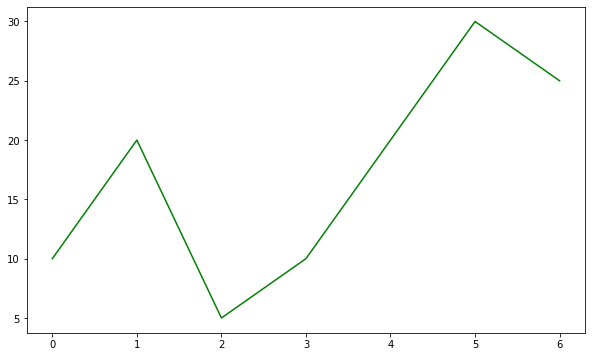

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

plt.figure(figsize=(10,6))

t = [0, 1, 2, 3, 4, 5, 6]
y = [10, 20, 5, 10, 20, 30, 25]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')

plt.show()

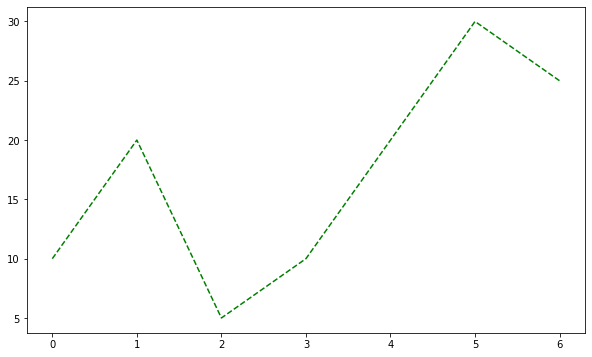

In [2]:
#linestyle을 dashed로 지정한 경우 
plt.figure(figsize=(10,6))

plt.plot(t, y, color='green', linestyle='dashed')

plt.show()

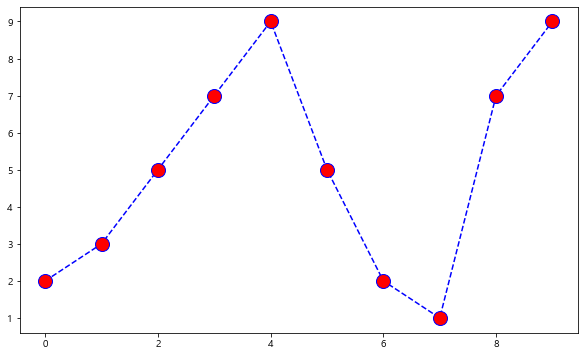

In [13]:
#이번에는 marker를 'o'로 지정하고 색깔과 크기를 지정한 경우 
plt.figure(figsize=(10,6))

plt.plot(t, y, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=14)

plt.show()

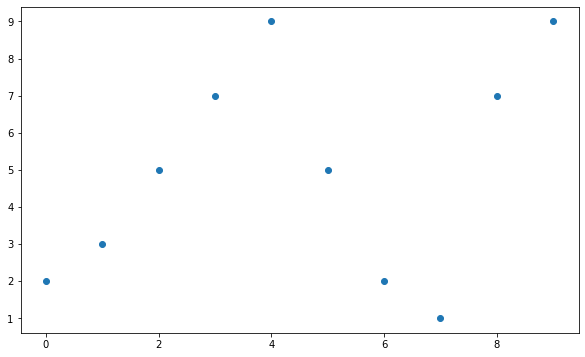

In [4]:
#시간축(t)과 데이터축(y)을 생성해서 산포도로 출력 
t = np.array([0,1,2,3,4,5,6,7,8,9])

y = np.array([2,3,5,7,9,5,2,1,7,9])

plt.figure(figsize=(10,6))

plt.scatter(t,y)

plt.show()

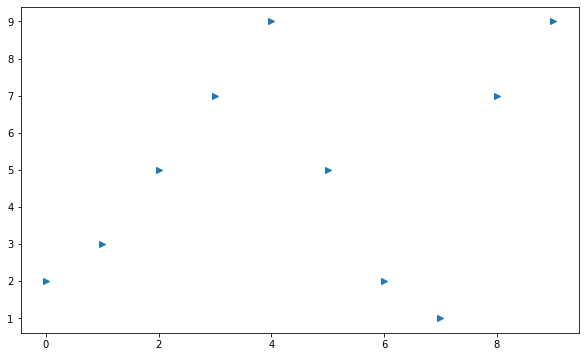

In [5]:
#이번에는 marker를 '>'로 지정 
plt.figure(figsize=(10,6))

plt.scatter(t, y, marker='>')

plt.show()

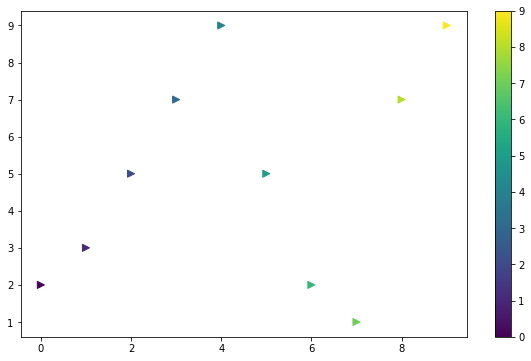

In [6]:
#이번에는 컬러맵을 생성 
colormap = t 

plt.figure(figsize=(10,6))

plt.scatter(t, y, s=50, c=colormap, marker='>')

plt.colorbar() # colorbar 추가 옵션

plt.show()

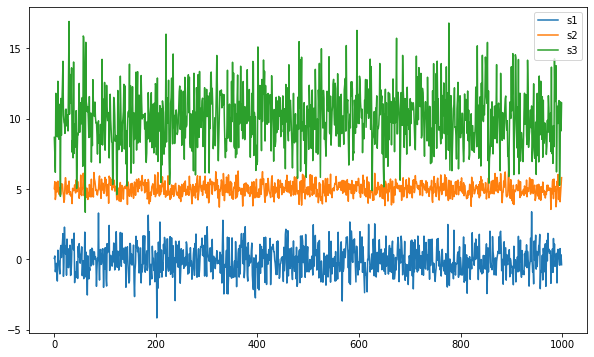

In [7]:
#랜덤값을 3개 만들고 스캐일을 1, 0.5, 2로 주고 파장을 출력 
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.figure(figsize=(10,6))

plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')

plt.legend()

plt.show()

In [8]:
#한글처리에 필요한 코드 rc 셋팅을 미리 변경 
import platform

from matplotlib import font_manager, rc

#유니코드 폰트의 -글자는 사용하지 않는다
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

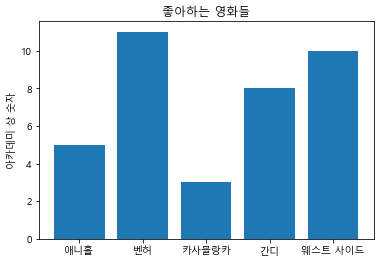

In [9]:
#영화 데이터로 막대 그래프 출력 
movies = ["애니홀", "벤허", "카사블랑카", "간디", "웨스트 사이드"]

num_oscars = [5, 11, 3, 8, 10]

plt.bar(movies, num_oscars)

plt.ylabel("아카데미 상 숫자")
plt.title("좋아하는 영화들")
plt.show()

In [10]:
#엑셀 파일 읽기
import pandas as pd 
dfExcel = pd.read_excel('c:\\work\\demo.xlsx', 'Sheet1')

dfExcel

,사번,성별,나이,판매금액,수입
0,E001,M,34,123,350
1,E002,F,40,114,450
2,E003,F,37,135,169
3,E004,M,30,139,189
4,E005,F,44,117,183
5,E006,M,36,121,90
6,E007,M,32,133,166
7,E008,F,26,140,120
8,E009,M,32,133,75
9,E010,M,36,133,40


<AxesSubplot:title={'center':'남녀별 판매금액 합계'}, xlabel='성별', ylabel='판매금액 합계'>

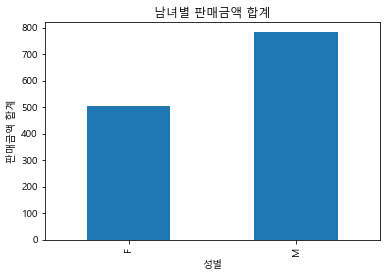

In [11]:
#남녀별 판매금액 합계 
var = dfExcel.groupby('성별').판매금액.sum()

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel('성별')

ax1.set_ylabel('판매금액 합계')

ax1.set_title('남녀별 판매금액 합계')

var.plot(kind='bar')

Text(0.5, 0, '단계')

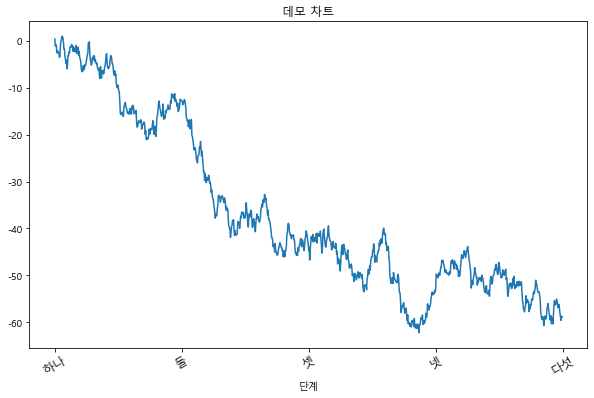

In [15]:
#눈금과 눈금간격, 범례를 지정하기 
# import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['하나', '둘', '셋', '넷', '다섯'], rotation=30, fontsize='large')

ax.set_title('데모 차트')

ax.set_xlabel('단계')

In [19]:
#groupby()메서드 사용 
from pandas import Series, DataFrame

df = DataFrame({'key1':['a','a','b','b','a'], 
                'key2':['one','two','one','two','one'], 
                'data1':np.random.randn(5), 
                'data2':np.random.randn(5)})

df

print(df)

grouped = df['data1'].groupby(df['key1'])

grouped


  key1 key2     data1     data2
0    a  one -0.549455  0.464094
1    a  two -1.070053 -0.326227
2    b  one  1.836169  0.474026
3    b  two -0.660408 -0.541544
4    a  one  0.335798 -0.039325


In [20]:
# 집계 method
print(grouped.mean())

print(grouped.sum())

print(grouped.count())

key1
a   -0.427903
b    0.587880
Name: data1, dtype: float64
key1
a   -1.283710
b    1.175761
Name: data1, dtype: float64
key1
a    3
b    2
Name: data1, dtype: int64


In [ ]:
# 복합키가 있는 경우(우선순위1, 우선순위2)
# method나 함수를 연속으로 호출(메서드 체인)
means = df['data1'].groupby( [df['key1'], df['key2']] ).mean()

means

key1  key2
a     one     0.128371
      two     0.376199
b     one     1.413552
      two     0.668102
Name: data1, dtype: float64